<a href="https://colab.research.google.com/github/FigueroaAC/GPs-for-SpentFuel/blob/master/Week%201/Day%201/Hands-On/Epidemiologia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Modelaje matemático de epidemias -1***


Actualmente nos encontramos en el 2021 despues de estar 18 meses confinados a estar en casa debido a una enfermedad extremadamente contagiosa llamada Covid19. 

A continuacion se presenta el modelo matemático determinista **SIR** (**S**uceptible, **I**nfeccioso, **R**ecobrado)  desarrollado en el 1927 por W.O Kermack y A.G. McKendrick. 

Este modelo describe la evolucion temporar de una enfermedad considerando solamente 3 posibles estados para los individuos:

* **S(t)**: Representa a los individuos **Suceptibles**, es decir aquellas personas que pueden ser infectadas al entrar en contacto con la enfermedad.

* **I(t)**: Representa a los individuos **Infectados**, es decir aquellas personas portadoras de la enfermedad y que pueden contagiar a personas del grupo **S**.

* **R(t)**: Representa a los individuos **Recobrados**, es decir aquellas personas que ya fueron infectadas y se recobraron, es decir, que no estan en condiciones de transmitir la enfermedad ni de enfermarse nuevamente.

Las transiciones entre los grupos esta definidad de la siguiente manera:

$ S \rightarrow I \rightarrow R$

Una persona primero es suceptible a la enfermedad **S** luego se infecta **I** y por ultimo, se recobra **R**.
 
Dada una poblacion fija, $ N = S(t)+ I(t) + R(t) $, las 3 ecuaciones diferenciales presentadas a continuacion, describen el modelo:

$ \frac{dS}{dt}= -\beta S(t)I(t) $

$ \frac{dI}{dt}= \beta S(t)I(t) - \gamma I(t)$

$ \frac{dR}{dt}=  \gamma I(t)$

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *modelo SIR* usando las ecuaciones diferenciales presentadas anteriormente sobre un grid 20x20
* Ilustrar graficamente la evolucion del sistema en funcion del tiempo

Existen varias maneras de realizar esto. Por ahora, pondremos en practica los conocimientos aprendidos en **introduccion a python**, **pensamiento algoritmico** asi como las librerias **numpy** y **matplotlib** 


Empezemos por cargar las librerias que usaremos:

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


Podemos describir el programa que determina la evolucion de las celdas de la siguiente manera: 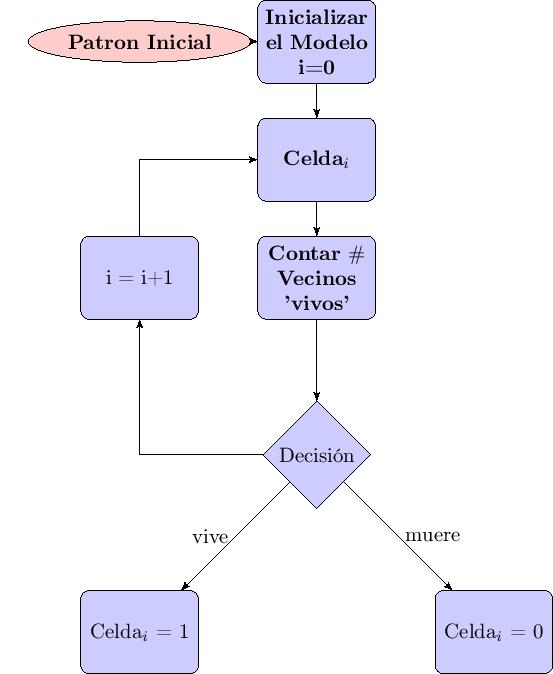

Siguiendo este algoritmo procedemos a decribir, generar el patron incicial e inicializar el modelo:

In [ ]:
Tamano_grid = 20
# Inicializamos el array 2D:
Grid  = np.zeros((Tamano_grid,Tamano_grid))

# Decidimos aleatoriamente inicializar algunos de los puntos del grid como 'vivos'
idx = np.random.randint(Tamano_grid,size=(int(0.12*(Tamano_grid**2)),2))
Grid[(idx[:,0],idx[:,1])] = 1


Podemos visualizar el array inicializado a traves de **matplotlib**

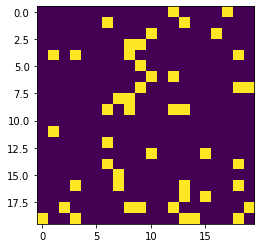

In [ ]:
plt.figure()
plt.imshow(Grid)

Debido a ciertas propiedades matematicas, no es posible predecir en general si este algoritmo se detendrá o no. Por esto iteraremos sobre un numero determinado de generaciones.

In [ ]:
N_Ciclos = 10

Para contar el numero de vecinos vivos necesitamos primero evaluar el entorno inmediato de cada celula. La siguiente figura ilustra en terminos de indices cuales serian los valores que debemos considerar:


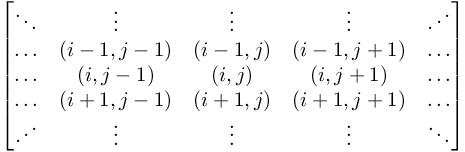

Describimos entonces la region local de cada celda ***$i$***

In [ ]:
def region_local(array,i,j):
    region = array[max(0,i-1):min(array.shape[0],i+2),
                   max(0,j-1):min(array.shape[1],j+2)]
    return region       

En el siguiente paso, basado en las reglas descritas en el principio, definimos la logica del programa que decidira si una celda vive o muere:

In [ ]:
def logica_celda(array,i,j,valor):
    r = region_local(array,i,j)
    N_vecinos = np.sum(r) - array[i,j]
    if valor == 1 and N_vecinos >= 2 and N_vecinos <=3:
        return 1
    if N_vecinos < 2 or N_vecinos > 3:
        return 0
    if valor == 0 and N_vecinos == 3:
        return 1
    else:
        return 0

Finalmente, es conveniente definir una funcion que itere sobre cada uno de las celdas y de esa manera agrupe la evolucion del array por generaciones o ciclos:

In [ ]:
def Ciclo(Grid):
    Tamano_grid = Grid.shape[0]
    for i in range(Tamano_grid):
        for j in range(Tamano_grid):
            Grid[i][j] = logica_celda(Grid,i,j,Grid[i][j])
    return Grid

Hecho todo esto, ahora simplemente nos queda generar una animacion para asi poder observar como evoluciona el **juego de la vida** segun nuestra implementaciones. Para esto usaremos el modulo **animation** de **matplotlib**, y describir una nueva funcion **Animar** que se encargar de iterar sobre la funcion **Ciclo**

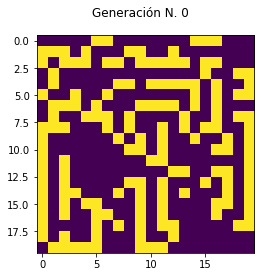

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML, Image
def Animar(i):
    Ciclo(Grid)
    ax1.clear()
    ax1.imshow(Grid)
    plt.suptitle('Generación N. {}'.format(i))

fig = plt.figure()
ax1 = fig.add_subplot()
animacion = animation.FuncAnimation(fig, Animar, interval=200,frames= 300)

animacion.save('Juego_de_la_vida.gif', writer='pillow', fps=60)
Image(url='Juego_de_la_vida.gif')


In [ ]:
Image(url='Juego_de_la_vida.gif')